<a href="https://colab.research.google.com/github/harshag24/Machine-Learning-Practice/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [27]:
df_train = pd.read_csv('train.csv')


In [73]:
df_test = pd.read_csv('test.csv')
df_test.head(5)



PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

In [5]:
df_train.head(5)


PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


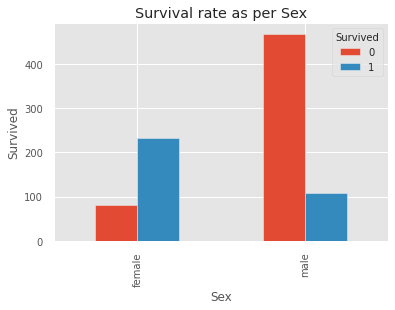

In [29]:
pd.crosstab(df_train.Sex ,df_train.Survived).plot(kind='bar')
plt.title('Survival rate as per Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

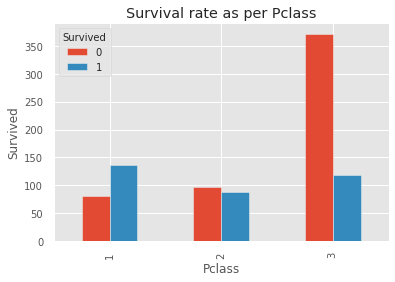

In [41]:
pd.crosstab(df_train.Pclass ,df_train.Survived).plot(kind='bar')
plt.title('Survival rate as per Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

In [53]:
df_train['SibSp'].nunique()

7

In [37]:

df_train['Age'].isna().sum()

177

In [39]:
df_train['Age'] = df_train['Age'].fillna(0)
df_train['Age'].isna().sum()

0

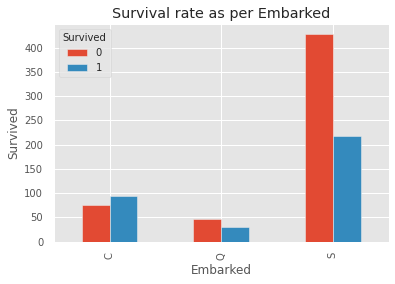

In [35]:
pd.crosstab(df_train.Embarked ,df_train.Survived).plot(kind='bar')
plt.title('Survival rate as per Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

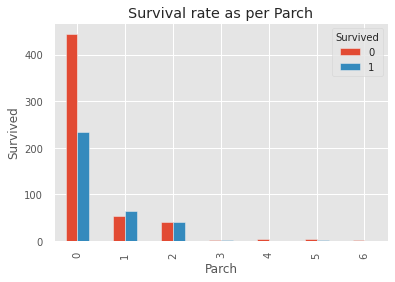

In [55]:
pd.crosstab(df_train.Parch ,df_train.Survived).plot(kind='bar')
plt.title('Survival rate as per Parch')
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.show()

In [45]:
df_train.drop(columns = ['Name','Ticket' ,'Fare']  , inplace= True)

In [48]:
df_train.drop(columns = ['Cabin']  , inplace= True)

In [49]:
df_train.head(5)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0            1         0       3    male  22.0      1      0        S
1            2         1       1  female  38.0      1      0        C
2            3         1       3  female  26.0      0      0        S
3            4         1       1  female  35.0      1      0        S
4            5         0       3    male  35.0      0      0        S

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [57]:
cat_vars=['Sex' , 'Embarked']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_train[var], prefix=var)
    df_train1=df_train.join(cat_list)
    df_train=df_train1

In [58]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [61]:
df_train.drop(columns = ['Sex','Embarked']  , inplace= True)

In [62]:
df_train.head(5)

PassengerId  Survived  Pclass  ...  Embarked_C  Embarked_Q  Embarked_S
0            1         0       3  ...           0           0           1
1            2         1       1  ...           1           0           0
2            3         1       3  ...           0           0           1
3            4         1       1  ...           0           0           1
4            5         0       3  ...           0           0           1

[5 rows x 11 columns]

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Sex_female   891 non-null    uint8  
 7   Sex_male     891 non-null    uint8  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 46.2 KB


In [64]:
s=0
d=0
for i in df_train['Survived']:
  if i==0:
    d+=1
  else:
    s+=1

print('Dead - ',d,' Survived -',s)

Dead -  549  Survived - 342


In [65]:
X = df_train.loc[:, df_train.columns != 'Survived']
Y = df_train.Survived

In [76]:
df_test['Age'] = df_test['Age'].fillna(0)
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [77]:
df_test.drop(columns = ['Name','Ticket' ,'Fare','Cabin']  , inplace= True)
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [78]:
cat_vars=['Sex' , 'Embarked']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_test[var], prefix=var)
    df_test1=df_test.join(cat_list)
    df_test=df_test1

In [79]:
df_test.head()

PassengerId  Pclass     Sex  ...  Embarked_C  Embarked_Q  Embarked_S
0          892       3    male  ...           0           1           0
1          893       3  female  ...           0           0           1
2          894       2    male  ...           0           1           0
3          895       3    male  ...           0           0           1
4          896       3  female  ...           0           0           1

[5 rows x 12 columns]

In [80]:
df_test.drop(columns=['Sex' , 'Embarked'] , inplace=True)

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Sex_female   418 non-null    uint8  
 6   Sex_male     418 non-null    uint8  
 7   Embarked_C   418 non-null    uint8  
 8   Embarked_Q   418 non-null    uint8  
 9   Embarked_S   418 non-null    uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 18.5 KB


In [66]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [70]:
@interact
def plot_tree(crit=["gini", "entropy"],
              split=["best", "random"],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion=crit,
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    estimator.fit(X, Y)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(Y, estimator.predict(X))))
    #print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

    graph = Source(tree.export_graphviz(estimator,
                                        out_file=None,
                                        feature_names=X.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [71]:
@interact
def plot_tree_rf(crit=["gini", "entropy"],
                 bootstrap=["True", "False"],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                       criterion=crit,
                                       bootstrap=bootstrap,
                                       n_estimators=forests,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf,
                                       n_jobs=-1,
                                      verbose=False).fit(X, Y)

    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(Y, estimator.predict(X))))
    #print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('\nVisualizing Decision Tree:', 0)
    
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=X.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…